In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/priyanshutuli/Downloads/Project-Data-Set-Repository-master/Dataset/cleaned_data.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
X = df['LIMIT_BAL'].values.reshape(-1,1)
y = df['default payment next month'].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()

In [10]:
lr.fit(X_train,y_train)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [11]:
y_predict = lr.predict(X_test)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [19]:
y_predict_probabilities = lr.predict_proba(X_test)

In [20]:
from sklearn.metrics import roc_curve

In [22]:
tpr, fpr, threshold = roc_curve(y_test, y_predict_probabilities[:,1])

In [23]:
from sklearn.metrics import roc_auc_score

In [24]:
roc_auc_score(y_test,y_predict_probabilities[:,1])

0.6254285398793467

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for testing')

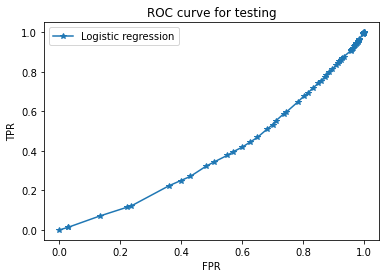

In [42]:
plt.plot(fpr, tpr, '*-')
plt.legend(['Logistic regression'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for testing')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


In [26]:
from sklearn.metrics import precision_recall_curve

In [28]:
precision, recall, threshold = precision_recall_curve(y_test,y_predict_probabilities[:,1])

In [29]:
print(precision)
print(recall)
print(threshold)

[0.22334835 0.2232791  0.223335   0.22339093 0.22344689 0.22353089
 0.22364297 0.22360171 0.22353236 0.22356041 0.22361651 0.22346439
 0.22354863 0.22350723 0.22352201 0.22348056 0.22566086 0.22573976
 0.22611176 0.22632674 0.226206   0.22691501 0.22752994 0.22767445
 0.22829113 0.22875382 0.23020035 0.23131094 0.23141846 0.23169235
 0.23401245 0.23453094 0.2356578  0.23668211 0.23777354 0.23958953
 0.2413584  0.24330563 0.24383734 0.24519917 0.24801169 0.24962975
 0.25131067 0.25546807 0.25782093 0.26103147 0.26763695 0.268153
 0.27473002 0.27781479 0.28084416 0.28850916 0.29114583 0.29582876
 0.29982669 0.30335044 0.3071874  0.31143552 0.32263308 0.32863436
 0.33349491 0.3798034  0.37511781 0.39280125 0.44166667 1.        ]
[1.         0.99943978 0.99943978 0.99943978 0.99943978 0.99943978
 0.99943978 0.99887955 0.99831933 0.99831933 0.99831933 0.99663866
 0.99663866 0.99607843 0.99551821 0.99495798 0.98039216 0.97871148
 0.97703081 0.97478992 0.9719888  0.96918768 0.96862745 0.96694

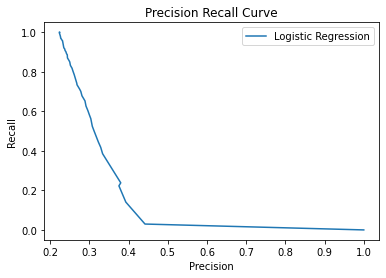

In [30]:
plt.plot(precision,recall)
plt.title('Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(['Logistic Regression'])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [31]:
from sklearn.metrics import auc

In [32]:
auc(recall,precision)

0.32842987662408896

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [33]:
y_train_predict = lr.predict(X_train)

In [34]:
y_train_predict_probabilities = lr.predict_proba(X_train)

In [36]:
roc_auc_score(y_train,y_train_predict_probabilities[:,1])

0.6157664127885331

In [38]:
tpr, fpr, threshold = roc_curve(y_train, y_train_predict_probabilities[:,1])

Text(0.5, 1.0, 'ROC curve for training')

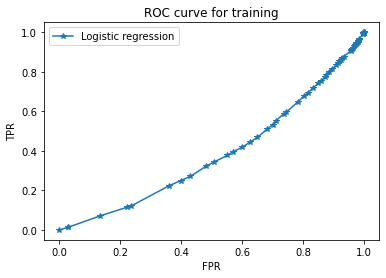

In [39]:
plt.plot(fpr, tpr, '*-')
plt.legend(['Logistic regression'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for training')

    How is this different, conceptually and quantitatively, from your earlier calculation?
